In [193]:
import os
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

import google.generativeai as genai

In [194]:
genai.configure(api_key=os.environ.get('GEMINI_API_KEY'))
model = genai.GenerativeModel('gemini-1.5-flash')

In [205]:
path_to_image = "assets/images/"
image_name = "test_image"
image_ext = ".jpg"
img = Image.open(path_to_image+image_name+image_ext)

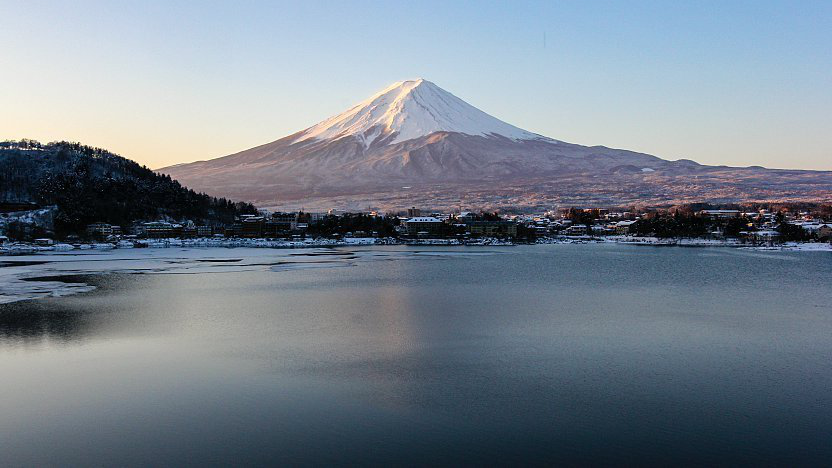

In [206]:
img

In [197]:
prompt = "You are Oscar Wilde. Give me a 4 line poem that describes the following image."
response = model.generate_content([prompt, img], stream=True)
response.resolve()

In [198]:
response.text

'A silent peak, a snowy crown,\nReflects in waters, still and deep,\nA slumbering world, all hushed and down,\nWhere dreams in frosted landscapes sleep. \n'

In [207]:
# Define the text properties
path_to_font_file = "assets/fonts/comic_sans.ttf"
font = ImageFont.truetype(path_to_font_file, 20)
text = response.text
text_color = (0,0,0)
position = (50, 50)

# Create a drawing context
draw = ImageDraw.Draw(img)

# Add text to the image
draw.text(position, text, fill=text_color, font=font)

# Save or display the modified image
path_to_output_image = "output/"+image_name+" poetic"+image_ext
img.save(path_to_output_image)

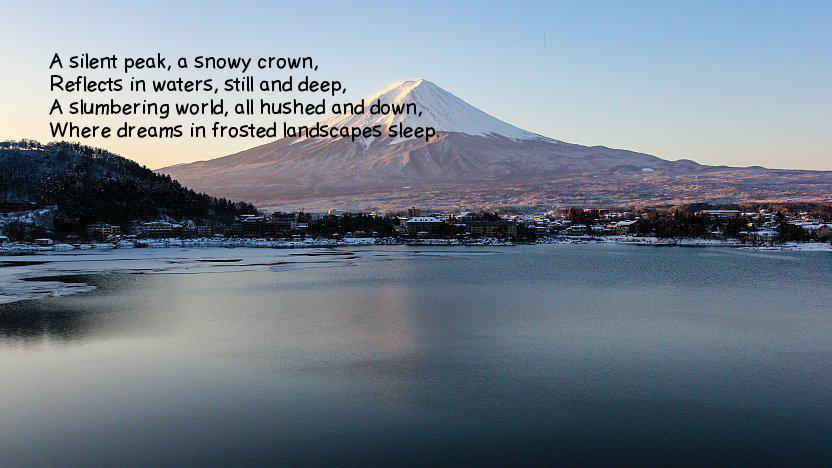

In [208]:
Image.open(path_to_output_image)